In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv')
X_train = train_data.iloc[:, :-1].values  # Features (excluding the last column, which is the target)
y_train = train_data.iloc[:, -1].values   # Labels (the last column)

test_data = pd.read_csv('/content/drive/MyDrive/multi_classification_test (1).csv')
X_test = test_data.iloc[:, :].values  # Features (all columns, assuming no target in test data)

def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def knn_predict(X_train, y_train, X_test, k=5):
    predictions = []
    for testp in X_test:
        distances = distance(X_train, testp)
        k_indices = distances.argsort()[:k]
        k_neighbors = y_train[k_indices]
        predictions.append(np.bincount(k_neighbors).argmax())
    return np.array(predictions)

k = 5
y_pred_test = knn_predict(X_train, y_train, X_test, k)

print(f"Shape of test_data: {test_data.shape}")
print(f"Shape of predicted labels: {y_pred_test.shape}")

test_data['Predicted_Label'] = y_pred_test

test_data.to_csv('/content/drive/MyDrive/test_data_with_predictions_multi_classification.csv', index=False)



Shape of test_data: (12000, 21)
Shape of predicted labels: (12000,)


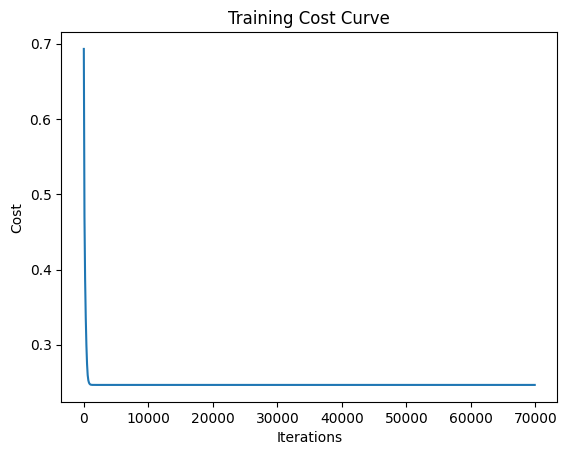

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv')
X_train = train_data[[f'Feature_{i}' for i in range(1, 21)]].values
y_train = train_data['Class']

test_data = pd.read_csv('/content/drive/MyDrive/binary_classification_test (3).csv')
X_test = test_data[[f'Feature_{i}' for i in range(1, 21)]].values

def normalize(X):
    return (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X_train = normalize(X_train)
X_test = normalize(X_test)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def grad(b_n, b0, X, y):
    m = X.shape[0]
    z = np.dot(X, b_n) + b0
    A = sigmoid(z)
    cost = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
    Z = A - y
    dW = np.dot(X.T, Z) / m
    db = np.sum(Z) / m
    return cost, dW, db

iterations = 700
learning_rate = 10
b_n = np.zeros(20)
b0 = 0

def accurate(b_n, b0, X, y):
    costs = []
    for i in range(iterations):
        cost, dW, db = grad(b_n, b0, X, y)
        b_n -= learning_rate * dW
        b0 -= learning_rate * db
        costs.append(cost)
    return b_n, b0, costs

b_n, b0, costs = accurate(b_n, b0, X_train, y_train)

def predict(b_n, b0, X):
    z = np.dot(X, b_n) + b0
    A = sigmoid(z)
    return (A >= 0.5).astype(int)



y_pred_test = predict(b_n, b0, X_test)

test_data_with_predictions = test_data.copy()
test_data_with_predictions['Predicted_Class'] = y_pred_test
test_data_with_predictions.to_csv('/content/drive/MyDrive/binary_classification_test_with_predictionsbinary_classification.csv', index=False)



plt.plot(range(0, len(costs) * 100, 100), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost Curve')
plt.show()


What is the degree: 3
b0 = 0.0
b1 = 7.490665156211304e-10
b2 = 3.6061909709148493e-09
b3 = 4.816013417193787e-10
b4 = 1.1633220169160982e-10
b5 = -1.8990162435094227e-09
b6 = 2.2182882655675486e-11
b7 = 7.100157120727031e-10
b8 = 7.779362292898326e-10
b9 = 7.243708473998185e-10
b10 = 4.0597795165011556e-10
b11 = -3.5386810620741675e-10
b12 = 4.4151206633408744e-10
b13 = -1.8673611351307983e-10
b14 = -2.3270404694809207e-09
b15 = 3.3791972868470165e-10
b16 = -1.0421126050925737e-09
b17 = 3.756926705061763e-09
b18 = -1.7040211855853433e-09
b19 = 1.5552325368458317e-09
b20 = -2.1808853196509473e-09
b21 = -3.1805969911695424e-11
b22 = -2.1836659379368032e-10
b23 = 3.673085294945791e-11
b24 = 5.713197996232017e-10
b25 = -1.2441989137500841e-09
Final MSE: 5.979277162732077e-17


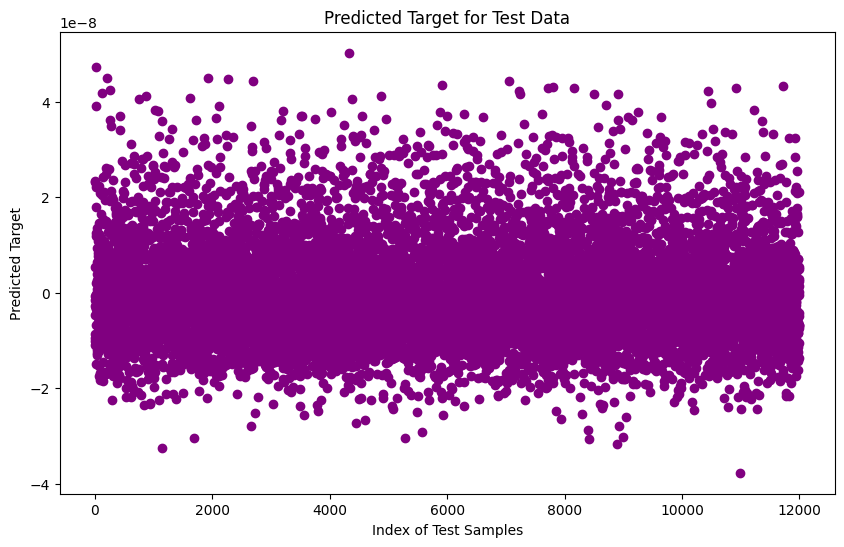

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/polynomial_regression_train.csv')

Feature_1 = data['Feature_1'].values
Feature_2 = data['Feature_2'].values
Feature_3 = data['Feature_3'].values
Feature_4 = data['Feature_4'].values
Feature_5 = data['Feature_5'].values
Target = data['Target'].values

x_n = {'x1': Feature_1, 'x2': Feature_2, 'x3': Feature_3, 'x4': Feature_4, 'x5': Feature_5}
y = Target

iteration = 1000
learning_rate = 1e-2
m = len(Feature_1)

n = int(input('What is the degree: '))

X_poly = []
for key in x_n:
    for r in range(1, n + 1):
        X_poly.append(np.power(x_n[key], r))

X_interaction = []
keys = list(x_n.keys())
for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        X_interaction.append(x_n[keys[i]] * x_n[keys[j]])

X = np.array(X_poly + X_interaction).T
X = np.hstack([np.ones((X.shape[0], 1)), X])

def normalize(X):
    return (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X = normalize(X)

b_n = np.zeros(X.shape[1])

def gradient(X, y, b_n):
    return (-1 / m) * np.dot(X.T, (y - np.dot(X, b_n)))

def mean_squared_error(y, y_pred):
    return (1 / m) * np.sum((y - y_pred) ** 2)

mse_values = []

for j in range(iteration):
    grad = gradient(X, y, b_n)
    b_n -= learning_rate * grad

    y_pred = np.dot(X, b_n)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

mse_final = mean_squared_error(y, y_pred)

for i in range(X.shape[1]):
    print(f'b{i} = {b_n[i]}')

print(f'Final MSE: {mse_final}')

test_data = pd.read_csv('/content/drive/MyDrive/polynomial_regression_test.csv')

Feature_1_test = test_data['Feature_1'].values
Feature_2_test = test_data['Feature_2'].values
Feature_3_test = test_data['Feature_3'].values
Feature_4_test = test_data['Feature_4'].values
Feature_5_test = test_data['Feature_5'].values

x_n_test = {'x1': Feature_1_test, 'x2': Feature_2_test, 'x3': Feature_3_test, 'x4': Feature_4_test, 'x5': Feature_5_test}

X_poly_test = []
for key in x_n_test:
    for r in range(1, n + 1):
        X_poly_test.append(np.power(x_n_test[key], r))

X_interaction_test = []
keys_test = list(x_n_test.keys())
for i in range(len(keys_test)):
    for j in range(i + 1, len(keys_test)):
        X_interaction_test.append(x_n_test[keys_test[i]] * x_n_test[keys_test[j]])

X_test = np.array(X_poly_test + X_interaction_test).T
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

X_test = (X_test - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

y_pred_test = np.dot(X_test, b_n)

test_data['Predicted_Target'] = y_pred_test

test_data.to_csv('/content/drive/MyDrive/test_data_with_predictions.csv', index=False)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred_test)), y_pred_test, color='purple')
plt.xlabel('Index of Test Samples')
plt.ylabel('Predicted Target')
plt.title('Predicted Target for Test Data')
plt.show()



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/linear_regression_train.csv')

x_n = data[[f'Feature_{i}' for i in range(1, 26)]].values
y = data['Target'].values

x_mean = np.mean(x_n, axis=0)
x_std = np.std(x_n, axis=0)
x_n = (x_n - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std
#n = 25 #number of independent variable
#here i is b_i like b1,b2,b3
b_n = np.zeros(26)

iterations = 10000

learning_rate = 1e-2


N = len(x_n)



for j in range(iterations):
    z = b_n[0] + np.dot(x_n, b_n[1:])

    mse = np.mean((y - z) ** 2)
    b_n[0] -= learning_rate * -2 * np.sum(y - z) / len(x_n)
    for o in range(1, 26):
        b_n[o] -= learning_rate * -2 * np.sum((y - z)*x_n[:, o-1]) / len(x_n)


z = b_n[0] + np.dot(x_n, b_n[1:])
#e = np.sum(y - (b_n[0] + sum(b_n[i + 1] * x_n[:, 0] for i in range(25))))
mse = np.mean((y - z) ** 2)
z = z * y_std + y_mean
y_A = y * y_std + y_mean


data_test = pd.read_csv('/content/drive/MyDrive/linear_regression_test.csv')
x_test = data_test[[f'Feature_{i}' for i in range(1, 26)]].values

# Normalize test data using training statistics
x_test = (x_test - x_mean) / x_std

# Predict using the learned model coefficients
z_test = b_n[0] + np.dot(x_test, b_n[1:])

# Denormalize the predictions
y_pred_test = z_test * y_std + y_mean

test_data['Predicted_Target'] = y_pred_test

test_data.to_csv('/content/drive/MyDrive/test_data_with_predictionslinear_regression.csv', index=False)

